### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.

# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Determine whether there are missing values.
print(ad[ad.isna().any(axis = 1)].shape)

(0, 8)


In [4]:
# Determine the metadata of the data set.
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [5]:
# Determine the descriptive statistics of the data set.
def describe(df):
    for column in df.columns:
        if df[str(column)].dtype == "datetime64[ns]":
            print(df[str(column)].describe(datetime_is_numeric=True))
        else: 
            print(df[str(column)].describe())
            
ad_description = describe(ad)
print(ad_description)

count     137793
unique       106
top          26A
freq        1484
Name: sub_icb_location_code, dtype: object
count        137793
unique          106
top       E38000239
freq           1484
Name: sub_icb_location_ons_code, dtype: object
count                                137793
unique                                  106
top       NHS Norfolk and Waveney ICB - 26A
freq                                   1484
Name: sub_icb_location_name, dtype: object
count        137793
unique           42
top       E54000057
freq          12668
Name: icb_ons_code, dtype: object
count        137793
unique            7
top       E40000010
freq          33112
Name: region_ons_code, dtype: object
count        137793
unique          212
top       01-Dec-21
freq            742
Name: appointment_date, dtype: object
count                     137793
unique                         7
top       Unknown / Data Quality
freq                       20161
Name: actual_duration, dtype: object
count    137793.000000
me

In [6]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
# Determine whether there are missing values.
print(ar[ar.isna().any(axis = 1)].shape)

(0, 7)


In [8]:
# Determine the metadata of the data set.
print(ar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None


In [9]:
# Determine the descriptive statistics of the data set.
ar_description = describe(ar)
print(ar_description)

count        596821
unique           42
top       E54000057
freq          54527
Name: icb_ons_code, dtype: object
count      596821
unique         30
top       2020-03
freq        21350
Name: appointment_month, dtype: object
count       596821
unique           3
top       Attended
freq        232137
Name: appointment_status, dtype: object
count                   596821
unique                       3
top       Other Practice staff
freq                    241557
Name: hcp_type, dtype: object
count           596821
unique               5
top       Face-to-Face
freq            180410
Name: appointment_mode, dtype: object
count       596821
unique           8
top       Same Day
freq         95502
Name: time_between_book_and_appointment, dtype: object
count    596821.000000
mean       1244.601857
std        5856.887042
min           1.000000
25%           7.000000
50%          47.000000
75%         308.000000
max      211265.000000
Name: count_of_appointments, dtype: float64
None


In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# Determine whether there are missing values.
print(nc[nc.isna().any(axis = 1)].shape)

(0, 8)


In [12]:
# Determine the metadata of the data set.
print(nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


In [13]:
# Determine the descriptive statistics of the data set.
nc_description = describe(nc)
print(nc_description)

count                           817394
mean     2022-01-16 00:50:35.860796160
min                2021-08-01 00:00:00
25%                2021-10-25 00:00:00
50%                2022-01-18 00:00:00
75%                2022-04-07 00:00:00
max                2022-06-30 00:00:00
Name: appointment_date, dtype: object
count        817394
unique           42
top       E54000057
freq          59180
Name: icb_ons_code, dtype: object
count                                817394
unique                                  106
top       NHS North West London ICB - W2U3Z
freq                                  13007
Name: sub_icb_location_name, dtype: object
count               817394
unique                   5
top       General Practice
freq                359274
Name: service_setting, dtype: object
count                     817394
unique                         3
top       Care Related Encounter
freq                      700481
Name: context_type, dtype: object
count                   817394
unique        

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [14]:
# Determine the number of locations.
no_of_locations = nc['sub_icb_location_name'].unique().size
print(no_of_locations)

106


**Question 2:** What are the five locations with the highest number of records?



In [15]:
# Determine the top five locations based on record count.
location_counts = nc['sub_icb_location_name'].value_counts().head()

print(location_counts)

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [16]:
# Determine the number of service settings.
no_of_ss = nc['service_setting'].unique().size
print(no_of_ss)

5


In [17]:
# Determine the number of context types.
no_of_ct = nc['context_type'].unique().size
print(no_of_ct)

3


In [18]:
# Determine the number of national categories.
no_of_nc = nc['national_category'].unique().size
print(no_of_nc)

18


In [19]:
# Determine the number of appointment status.
no_of_as = ar['appointment_status'].unique().size
print(no_of_as)

3


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [20]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [21]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [22]:
# Change the date format of ad['appointment_date'].
ad.appointment_date = pd.to_datetime(ad.appointment_date)

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [23]:
# Change the date format of ar['appointment_date'].
ar.appointment_month = pd.to_datetime(ar.appointment_month)

# View the DateFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [24]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
#the latest appointment date from the ad dataframe is shown by the printed result below 
print(ad.appointment_date.max())
#the earliest appointment date from the ad dataframe is shown by the printed result below
print(ad.appointment_date.min())

2022-06-30 00:00:00
2021-12-01 00:00:00


In [25]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
#the latest appointment date from the nc dataframe is shown by the printed result below 
print(nc.appointment_date.max())
#the earliest appointment date from the nc dataframe is shown by the printed result below
print(nc.appointment_date.min())

2022-06-30 00:00:00
2021-08-01 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [26]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_subset = nc[(nc.sub_icb_location_name == 'NHS North West London ICB - W2U3Z') & ('2022-1-1'<nc.appointment_date) & (nc.appointment_date<'2022-6-1')]

# View the output.
nc_subset.service_setting.value_counts()

General Practice             2080
Other                        1307
Primary Care Network         1261
Extended Access Provision    1076
Unmapped                      150
Name: service_setting, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [31]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
no_of_appointments = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).sum().sort_values(by = 'count_of_appointments', ascending = False)
print(no_of_appointments)

                                   count_of_appointments
appointment_date appointment_date                       
2021             11                             30405070
                 10                             30303834
2022             3                              29595038
2021             9                              28522501
2022             5                              27495508
                 6                              25828078
                 1                              25635474
                 2                              25355260
2021             12                             25140776
2022             4                              23913060
2021             8                              23852171


**Question 4:** What was the total number of records per month?

In [33]:
# Total number of records per month.
nc['appointment_month'].value_counts()

2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
Name: appointment_month, dtype: int64

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [34]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [30]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

In [31]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month','service_setting']).sum()

# View output.
nc_ss 

count_of_appointments
appointment_month service_setting                                 
2021-08           Extended Access Provision                 160927
                  General Practice                        21575852
                  Other                                     449101
                  Primary Care Network                      432448
                  Unmapped                                 1233843
2021-09           Extended Access Provision                 187906
                  General Practice                        25940821
                  Other                                     527174
                  Primary Care Network                      530485
                  Unmapped                                 1336115
2021-10           Extended Access Provision                 209539
                  General Practice                        27606171
                  Other                                     556487
                  Primary Care Network                      564981
                  Unmapped                                 1366656
2021-11           Extended Access Provision                 207577
                  General Practice                        27767889
                  Other                                     558784
                  Primary Care Network                      614324
                  Unmapped                                 1256496
2021-12           Extended Access Provision                 173504
                  General Practice                        23008818
                  Other                                     464718
                  Primary Care Network                      539479
                  Unmapped                                  954257
2022-01           Extended Access Provision                 186375
                  General Practice                        23583053
                  Other                                     457440
                  Primary Care Network                      569044
                  Unmapped                                  839562
2022-02           Extended Access Provision                 196627
                  General Practice                        23305934
                  Other                                     456153
                  Primary Care Network                      585300
                  Unmapped                                  811246
2022-03           Extended Access Provision                 231905
                  General Practice                        27187368
                  Other                                     530677
                  Primary Care Network                      702176
                  Unmapped                                  942912
2022-04           Extended Access Provision                 192284
                  General Practice                        21916791
                  Other                                     437402
                  Primary Care Network                      606270
                  Unmapped                                  760313
2022-05           Extended Access Provision                 220511
                  General Practice                        25238620
                  Other                                     503327
                  Primary Care Network                      712280
                  Unmapped                                  820770
2022-06           Extended Access Provision                 209652
                  General Practice                        23680374
                  Other                                     478813
                  Primary Care Network                      700599
                  Unmapped                                  758640

**Service settings:**

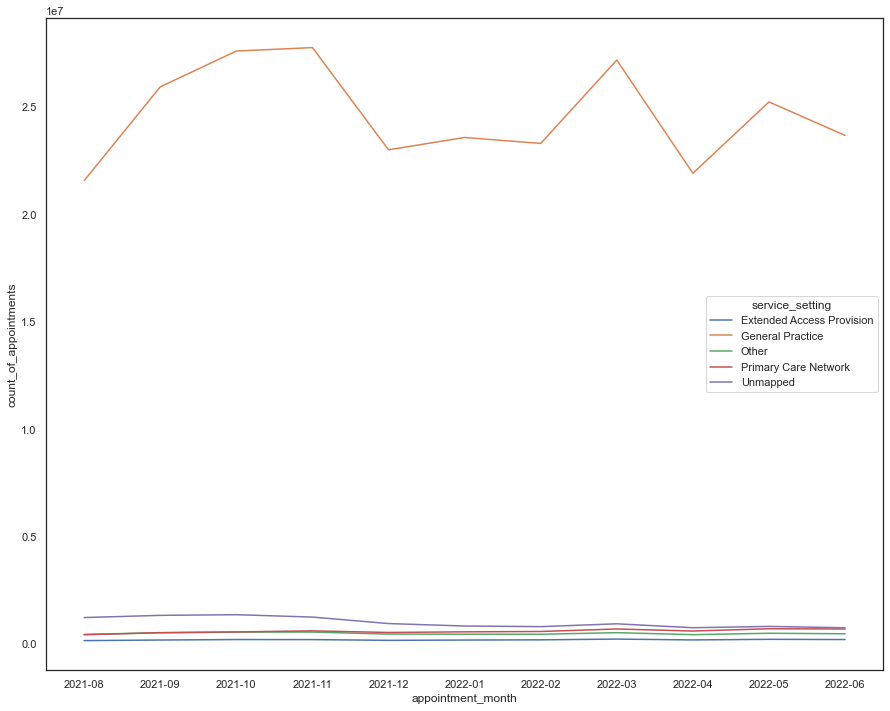

In [32]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
monthly_ss = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = nc_ss, hue = 'service_setting', ci = 'none')

**Context types:**

In [33]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc.groupby(['appointment_month','context_type']).sum()

# View output.
nc_ct

count_of_appointments
appointment_month context_type                                 
2021-08           Care Related Encounter               20255235
                  Inconsistent Mapping                  2363093
                  Unmapped                              1233843
2021-09           Care Related Encounter               24404251
                  Inconsistent Mapping                  2782135
                  Unmapped                              1336115
2021-10           Care Related Encounter               26125201
                  Inconsistent Mapping                  2811977
                  Unmapped                              1366656
2021-11           Care Related Encounter               26282778
                  Inconsistent Mapping                  2865796
                  Unmapped                              1256496
2021-12           Care Related Encounter               21798612
                  Inconsistent Mapping                  2387907
                  Unmapped                               954257
2022-01           Care Related Encounter               22441947
                  Inconsistent Mapping                  2353965
                  Unmapped                               839562
2022-02           Care Related Encounter               22211021
                  Inconsistent Mapping                  2332993
                  Unmapped                               811246
2022-03           Care Related Encounter               25928850
                  Inconsistent Mapping                  2723276
                  Unmapped                               942912
2022-04           Care Related Encounter               20904193
                  Inconsistent Mapping                  2248554
                  Unmapped                               760313
2022-05           Care Related Encounter               24101243
                  Inconsistent Mapping                  2573495
                  Unmapped                               820770
2022-06           Care Related Encounter               22621827
                  Inconsistent Mapping                  2447611
                  Unmapped                               758640

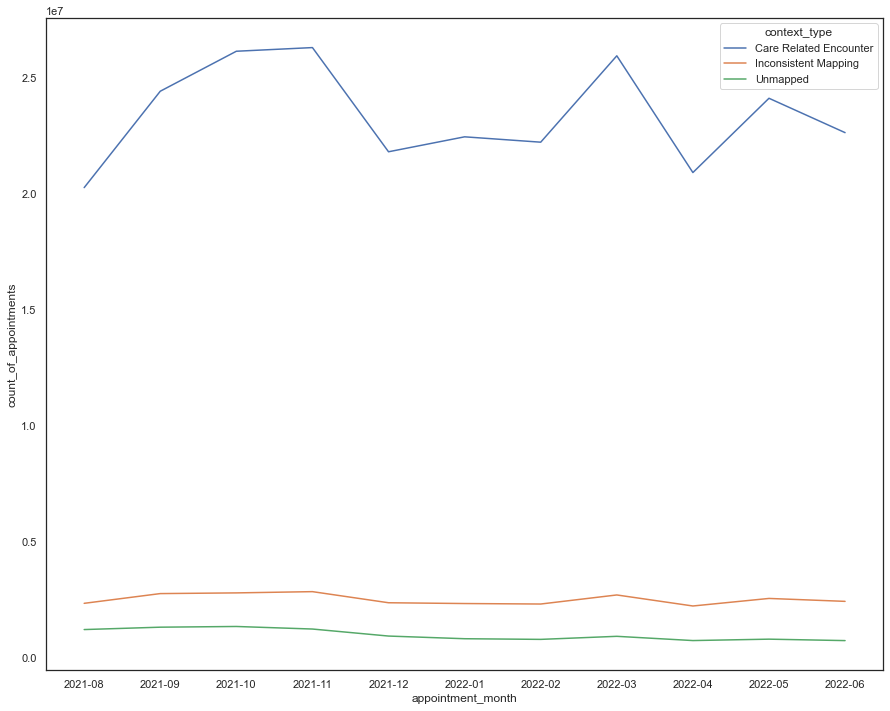

In [34]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
monthly_ct = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = nc_ct , hue = 'context_type', ci = 'none')

**National categories:**

In [35]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['appointment_month','national_category']).sum()

# View output.
nc_nc

count_of_appointments
appointment_month national_category                                                        
2021-08           Care Home Needs Assessment & Personalised Care ...                  29676
                  Care Home Visit                                                     47583
                  Clinical Triage                                                   3704207
                  General Consultation Acute                                        4280920
                  General Consultation Routine                                      7756045
...                                                                                     ...
2022-06           Social Prescribing Service                                          55066
                  Structured Medication Review                                       187800
                  Unmapped                                                           758640
                  Unplanned Clinical Activity                                        274491
                  Walk-in                                                             35935

[198 rows x 1 columns]

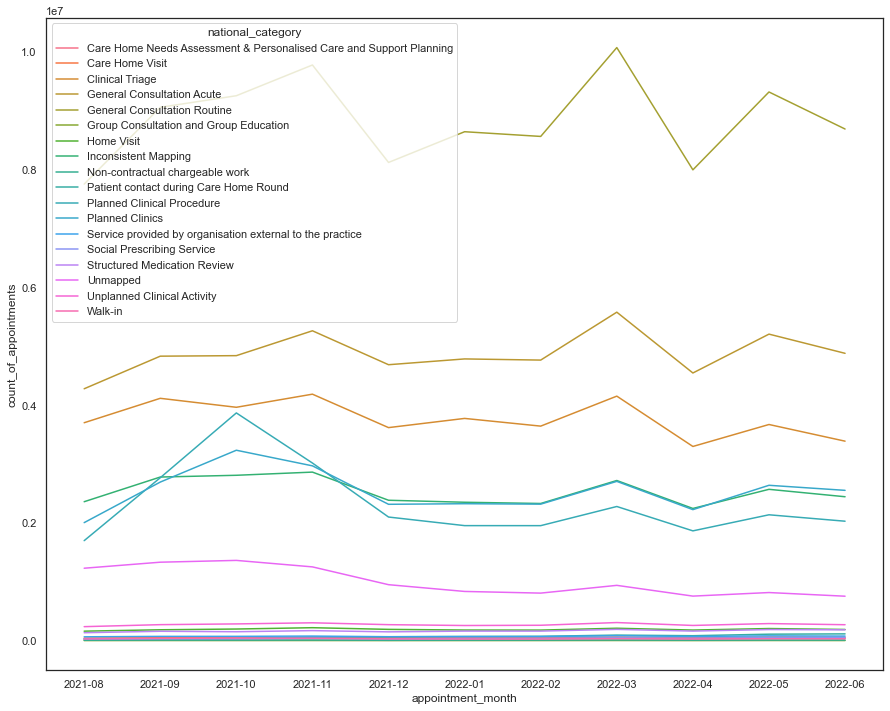

In [36]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
monthly_nc = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = nc_nc, hue = 'national_category', ci = 'none')

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [37]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['appointment_date','appointment_month','service_setting']).sum()

# View output.
nc_ss_day = nc_ss_day.reset_index()

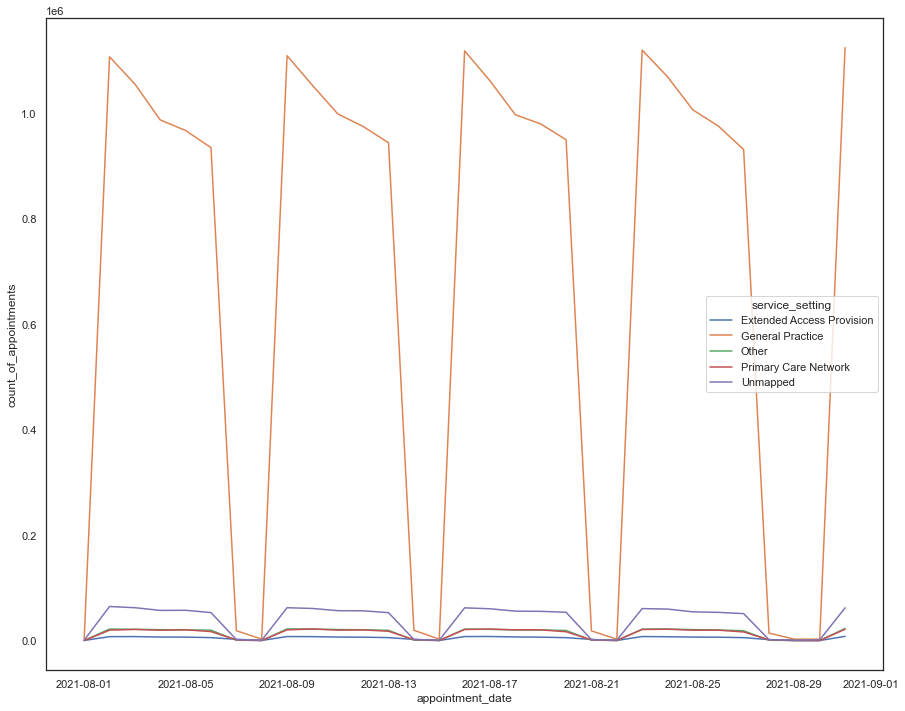

In [38]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
aug_2021 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', data = nc_ss_day[nc_ss_day.appointment_month == '2021-08'], hue = 'service_setting', ci = 'none')

**Autumn (October 2021):**

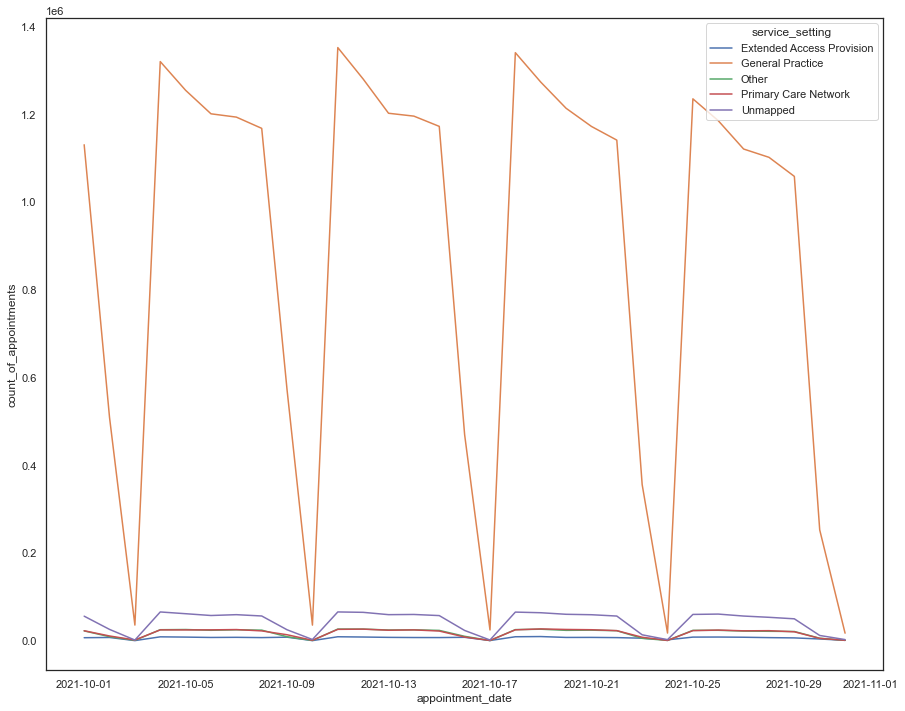

In [39]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
oct_2021 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', data = nc_ss_day[nc_ss_day.appointment_month == '2021-10'], hue = 'service_setting', ci = 'none')

**Winter (January 2022):**

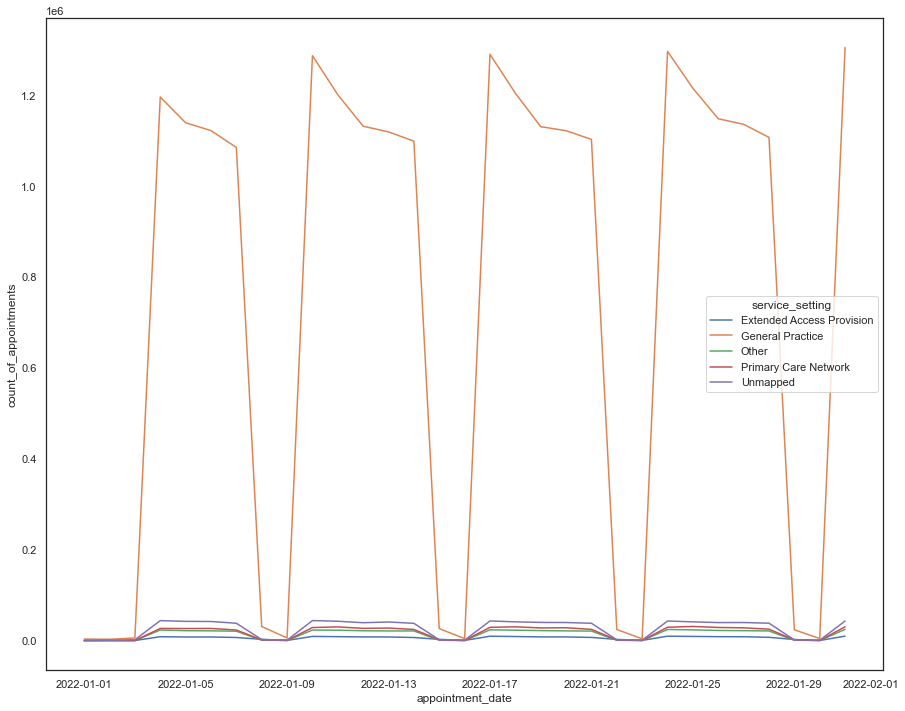

In [40]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
jan_2022 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', data = nc_ss_day[nc_ss_day.appointment_month == '2022-01'], hue = 'service_setting', ci = 'none')

**Spring (April 2022):**

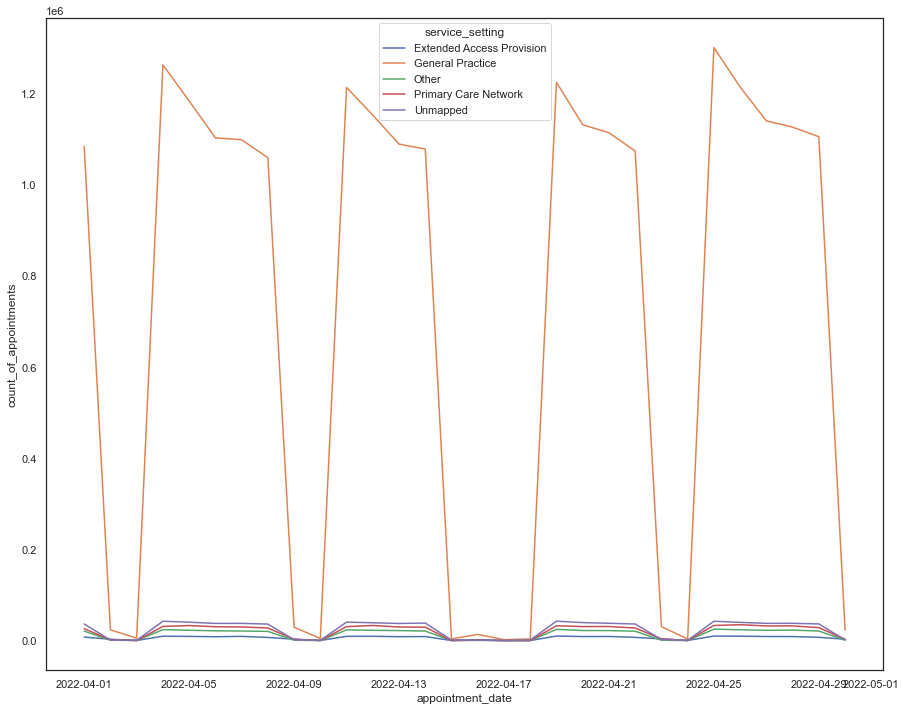

In [41]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
apr_2022 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', data = nc_ss_day[nc_ss_day.appointment_month == '2022-04'], hue = 'service_setting', ci = 'none')

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [42]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [43]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [44]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [45]:
# Explore the data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [46]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorite_count'].value_counts())

"""
Based off the unique value counts of retweeted and favourited messages, 
not much information other than skew of how popular the tweet is can be 
inferred from those columns. Hence other columns would be required to gain
a much more comprehensive understanding.
"""

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


'\nBased off the unique value counts of retweeted and favourited messages, \nnot much information other than skew of how popular the tweet is can be \ninferred from those columns. Hence other columns would be required to gain\na much more comprehensive understanding.\n'

In [47]:
# Create a new DataFrame containing only the text.
tweets_text = tweets["tweet_full_text"]

# View the DataFrame.
tweets_text.head()

0    As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                             RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                               RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4    ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take 

In [48]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
hashtags = pd.Series(tags).value_counts()

In [49]:
# Display the first 30 records.
hashtags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [50]:
# Convert the series to a DataFrame in preparation for visualisation.
hashtags = hashtags.to_frame().reset_index()

# Rename the columns.
hashtags = hashtags.rename(columns = {"index":"word", 0:"count"})

In [51]:
# Fix the count datatype.


# View the result.
hashtags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [52]:
# Display records where the count is larger than 10.
hashtags = hashtags[hashtags["count"]>10]

hashtags

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


Text(0.5, 1.0, 'Breakdown of popular hashtags')

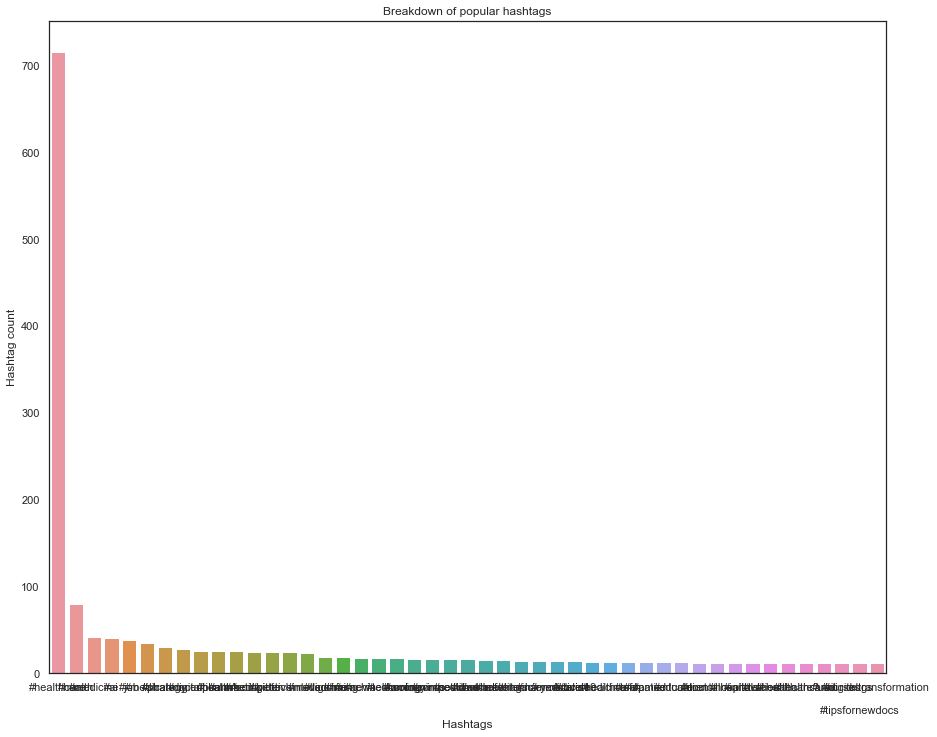

In [53]:
# Create a Seaborn barplot indicating records with a count >10 records.
hastags_viz = sns.barplot(data = hashtags, x = 'word', y = 'count')
hastags_viz.set(xlabel = "Hashtags", ylabel = "Hashtag count")
hastags_viz.set_title("Breakdown of popular hashtags")

# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [54]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [55]:
# Print the min and max dates.
print(ar.appointment_month.max())
print(ar.appointment_month.min())

2022-06-01 00:00:00
2020-01-01 00:00:00


In [56]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_agg = ar[ar.appointment_month >= "2021-08"]
ar_agg.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [57]:
# Create an aggregated data set to review the different features.
ar_agg = ar_agg[['appointment_month','hcp_type','appointment_status','appointment_mode','time_between_book_and_appointment','count_of_appointments']]
ar_agg = ar_agg.groupby(['appointment_month','hcp_type','appointment_status','appointment_mode','time_between_book_and_appointment','count_of_appointments'])
# View the DataFrame.
ar_agg.head

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000028FAAF7FF70>>

In [58]:
ar_agg = ar_agg.sum().reset_index()

In [59]:
ar_agg 

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,68
1,2021-08-01,GP,Attended,Face-to-Face,1 Day,539
2,2021-08-01,GP,Attended,Face-to-Face,1 Day,627
3,2021-08-01,GP,Attended,Face-to-Face,1 Day,887
4,2021-08-01,GP,Attended,Face-to-Face,1 Day,919
...,...,...,...,...,...,...
157938,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,3
157939,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,4
157940,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,12
157941,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,16


In [60]:
ar_df = ar[['appointment_month','count_of_appointments']] 

ar_df = ar_df.groupby('appointment_month')


In [61]:
# Determine the total number of appointments per month.
ar_df = ar_df.sum().reset_index()
#print(ar_df.info())
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = round(ar_df['count_of_appointments']/30,1)
# View the DataFrame.
print(ar_df)

   appointment_month  count_of_appointments  utilisation
0         2020-01-01               27199296     906643.2
1         2020-02-01               24104621     803487.4
2         2020-03-01               24053468     801782.3
3         2020-04-01               16007881     533596.0
4         2020-05-01               16417212     547240.4
5         2020-06-01               20690805     689693.5
6         2020-07-01               22491437     749714.6
7         2020-08-01               20150520     671684.0
8         2020-09-01               26714255     890475.2
9         2020-10-01               28301932     943397.7
10        2020-11-01               25061602     835386.7
11        2020-12-01               23535936     784531.2
12        2021-01-01               22492069     749735.6
13        2021-02-01               22399569     746652.3
14        2021-03-01               27225424     907514.1
15        2021-04-01               23879932     795997.7
16        2021-05-01           

In [62]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
from datetime import datetime
ar_df['appointment_month'] = ar_df['appointment_month'].apply(lambda x : x.strftime("%Y/%m"))

# Create a lineplot with Seaborn.

ar_df

,appointment_month,count_of_appointments,utilisation
0,2020/01,27199296,906643.2
1,2020/02,24104621,803487.4
2,2020/03,24053468,801782.3
3,2020/04,16007881,533596.0
4,2020/05,16417212,547240.4
5,2020/06,20690805,689693.5
6,2020/07,22491437,749714.6
7,2020/08,20150520,671684.0
8,2020/09,26714255,890475.2
9,2020/10,28301932,943397.7


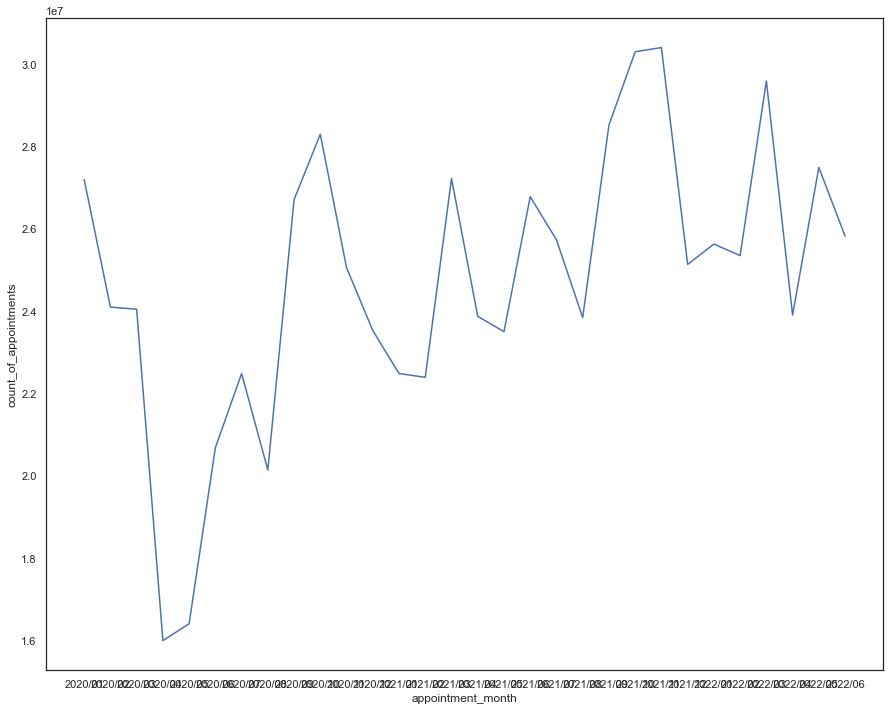

In [63]:
monthly_visits = sns.lineplot(data = ar_df, x = 'appointment_month', y = 'count_of_appointments') 

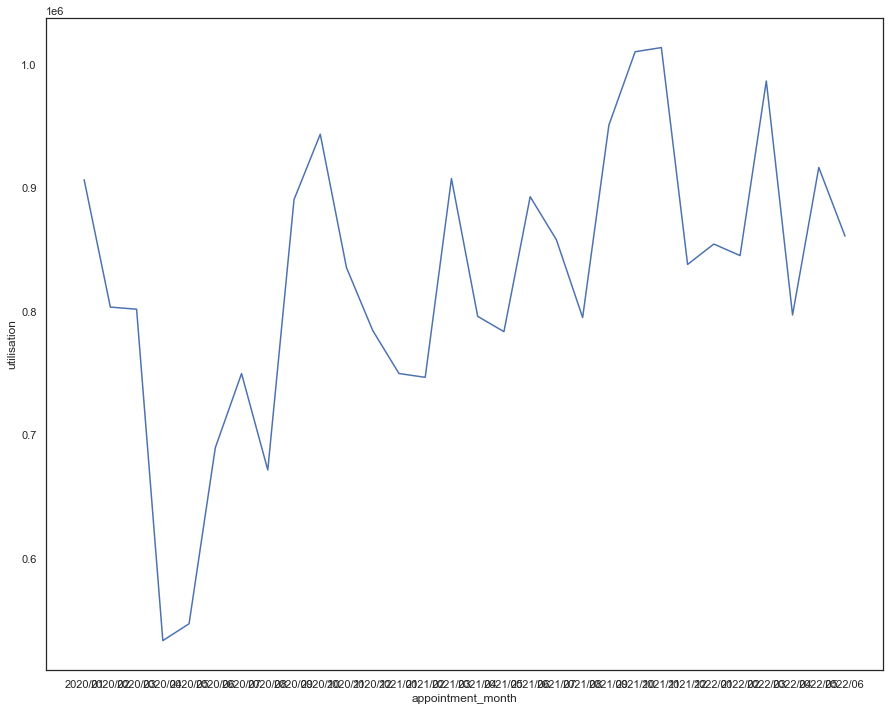

In [64]:
# Plot monthly capacity utilisation.
monthly_capacity_utilisation = sns.lineplot(data = ar_df, x = 'appointment_month', y = 'utilisation') 

# Create a lineplot.


**Question 2:** How do the healthcare professional types differ over time?

In [65]:
# Create a line plot to answer the question.
ar_df_hcp = ar[['appointment_month','hcp_type','count_of_appointments']] 

ar_df_hcp = ar_df_hcp.groupby(['appointment_month','hcp_type']).sum()

In [66]:
ar_df_hcp  = ar_df_hcp.reset_index()

In [67]:
ar_df_hcp

,appointment_month,hcp_type,count_of_appointments
0,2020-01-01,GP,14168932
1,2020-01-01,Other Practice staff,12326031
2,2020-01-01,Unknown,704333
3,2020-02-01,GP,12467976
4,2020-02-01,Other Practice staff,11002550
...,...,...,...
85,2022-05-01,Other Practice staff,12823200
86,2022-05-01,Unknown,878374
87,2022-06-01,GP,12893983
88,2022-06-01,Other Practice staff,12105677


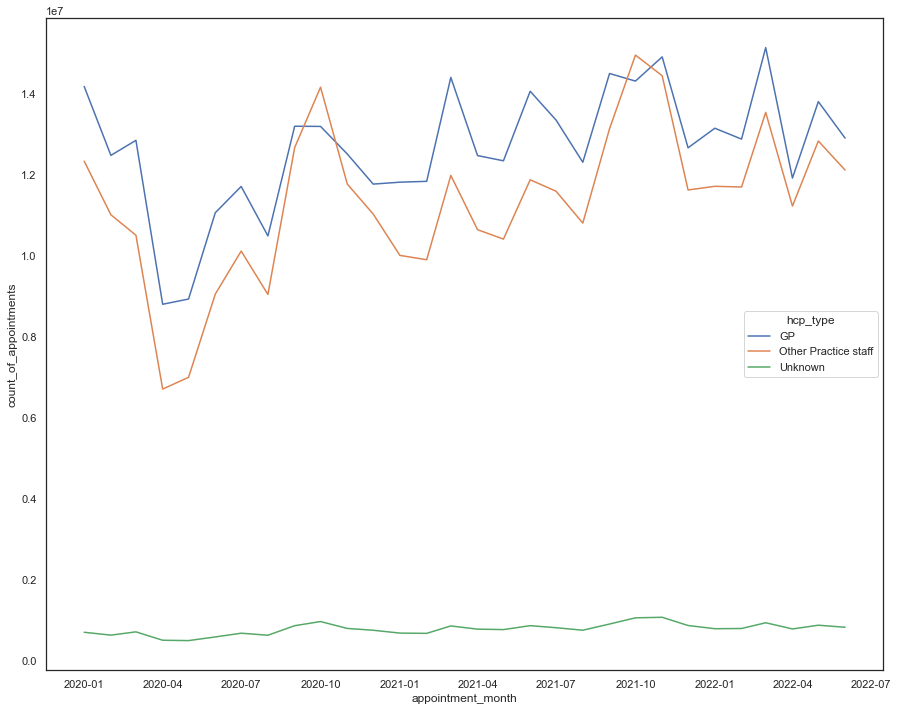

In [68]:
monthly_hcp_appointments = sns.lineplot(data = ar_df_hcp, x = "appointment_month", y = "count_of_appointments", hue = "hcp_type")

**Question 3:** Are there significant changes in whether or not visits are attended?

In [69]:
# Create a line plot to answer the question.
ar_df_as = ar[['appointment_month','appointment_status','count_of_appointments']] 

ar_df_as = ar_df_as.groupby(['appointment_month','appointment_status']).sum()

In [70]:
ar_df_as = ar_df_as.reset_index()

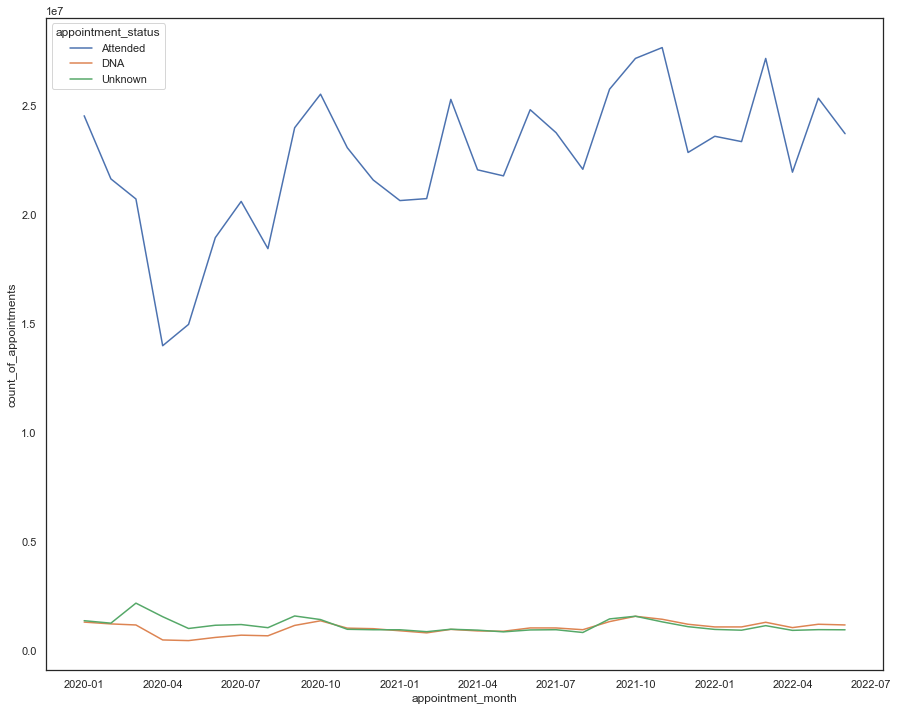

In [71]:
monthly_attended_appointments = sns.lineplot(data = ar_df_as, x = "appointment_month", y = "count_of_appointments", hue = "appointment_status")

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [72]:
# Create a line plot to answer the question.
ar_df_am = ar[['appointment_month','appointment_mode','count_of_appointments']] 

ar_df_am = ar_df_am.groupby(['appointment_month','appointment_mode']).sum()

In [73]:
ar_df_am = ar_df_am.reset_index()

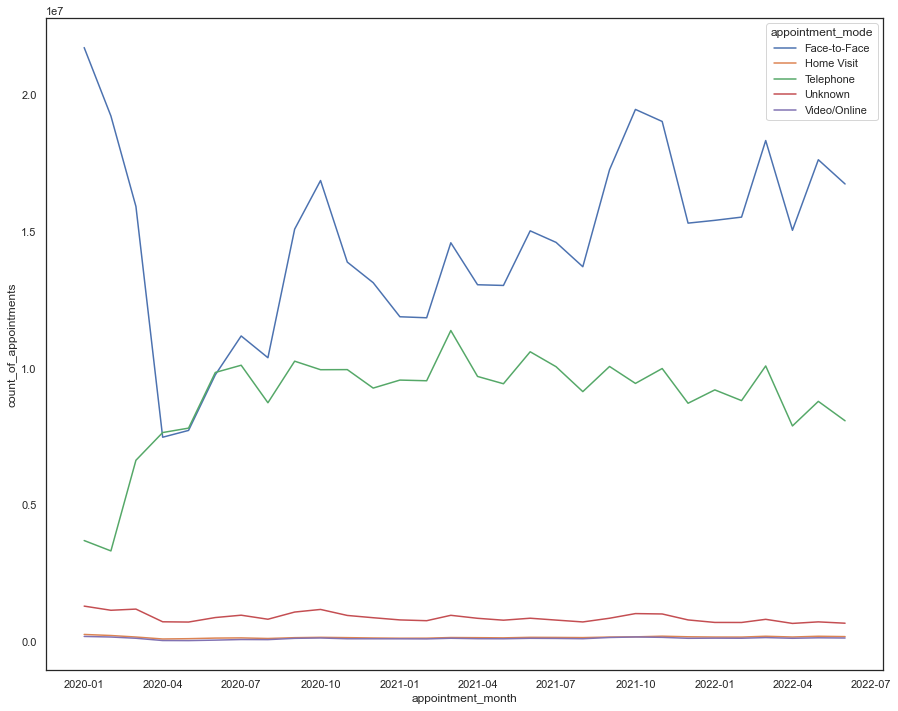

In [74]:
appointment_mode_by_month = sns.lineplot(data = ar_df_am, x = "appointment_month", y = "count_of_appointments", hue = "appointment_mode")

**Question 5:** Are there any trends in time between booking an appointment?

In [75]:
# Create a line plot to answer the question.
ar_df_tbbaa = ar[['appointment_month','time_between_book_and_appointment','count_of_appointments']] 

ar_df_tbbaa = ar_df_tbbaa.groupby(['appointment_month','time_between_book_and_appointment']).sum()

In [76]:
ar_df_tbbaa = ar_df_tbbaa.reset_index()

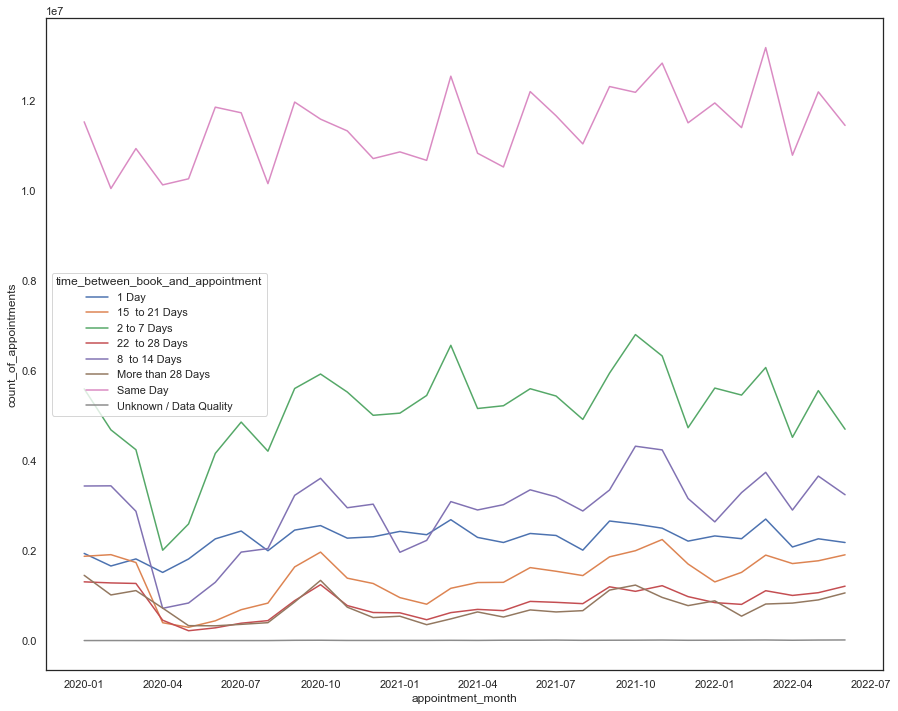

In [77]:
tbbaa_trends = sns.lineplot(data = ar_df_tbbaa, x = "appointment_month", y = "count_of_appointments", hue = "time_between_book_and_appointment")

**Question 6:** How do the spread of service settings compare?

In [78]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [99]:
nc_df_ss = nc[['appointment_month','count_of_appointments','service_setting']]

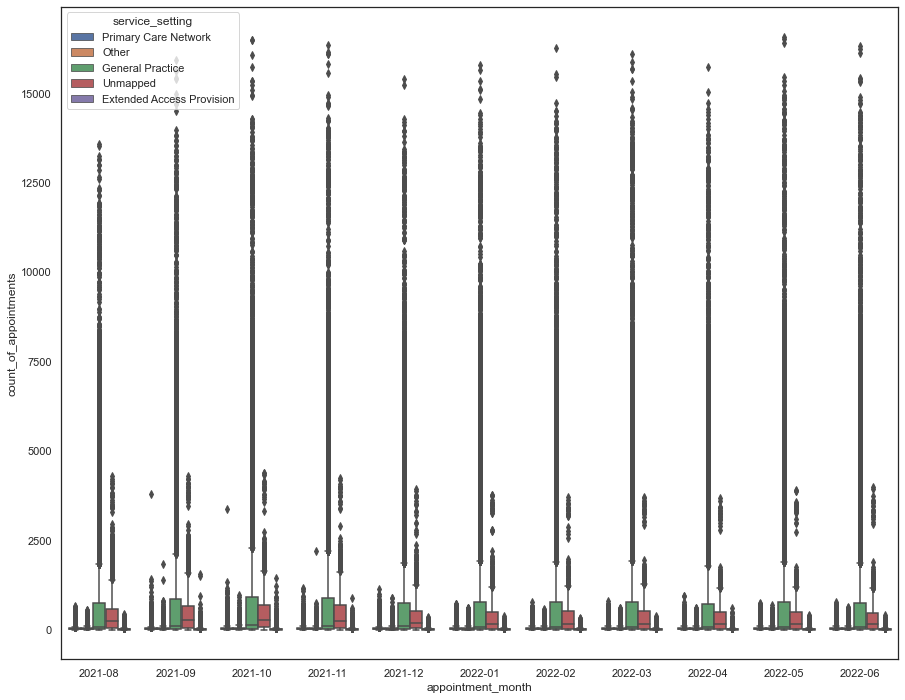

In [100]:
# Create a boxplot to investigate spread of service settings.
spread_ss = sns.boxplot(data=nc_df_ss,x='appointment_month', y='count_of_appointments',hue = 'service_setting')

In [102]:
# Create a boxplot to investigate the service settings without GP.
nc_df_ss_no_GP = nc_df_ss[nc_df_ss['service_setting'] != "General Practice"]
nc_df_ss_no_GP

,appointment_month,count_of_appointments,service_setting
0,2021-08,3,Primary Care Network
1,2021-08,7,Other
6,2021-08,372,Unmapped
7,2021-08,4,Primary Care Network
8,2021-08,98,Other
...,...,...,...
817389,2022-06,12,Extended Access Provision
817390,2022-06,4,Extended Access Provision
817391,2022-06,92,Extended Access Provision
817392,2022-06,4,Extended Access Provision


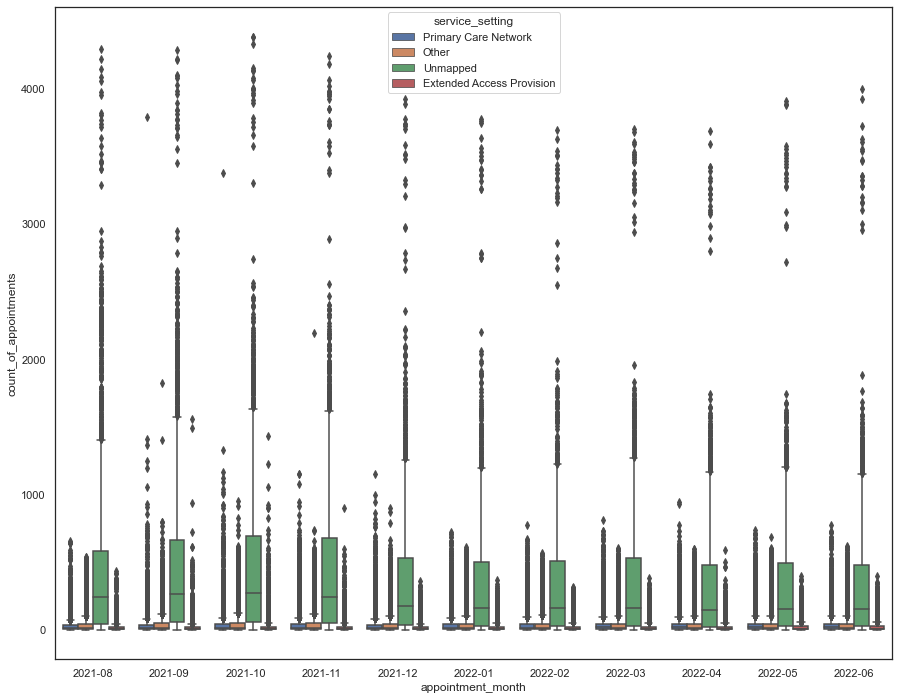

In [103]:
spread_ss_no_GP = sns.boxplot(data=nc_df_ss_no_GP,x='appointment_month', y='count_of_appointments',hue = 'service_setting')

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.